In [1]:
%pip install boxdetect

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


boxdetect te pide png de entrada, convertido el pdf a png en terminal con:
pdftoppm -png solution_12345.pdf out-im

In [2]:
from boxdetect import config
from boxdetect.pipelines import get_boxes

In [3]:

#tiene que ser un png
file_name = '../pyexams examples/en/png/sol_pdftoppm-1.png'

cfg = config.PipelinesConfig()

# important to adjust these values to match the size of boxes on your image
cfg.width_range = (15,30)
cfg.height_range = (15,30)

# the more scaling factors the more accurate the results but also it takes more time to processing
# too small scaling factor may cause false positives
# too big scaling factor will take a lot of processing time
cfg.scaling_factors = [1.0]

# w/h ratio range for boxes/rectangles filtering
cfg.wh_ratio_range = (0.8, 1.2)

# group_size_range starting from 2 will skip all the groups
# with a single box detected inside (like checkboxes)
cfg.group_size_range = (1, 1)

# num of iterations when running dilation tranformation (to engance the image)
cfg.dilation_iterations = 0

In [4]:
rects, grouping_rects, image, output_image = get_boxes(
    file_name, cfg=cfg, plot=False)

print(grouping_rects)

Processing file:  ../pyexams examples/en/png/sol_pdftoppm-1.png
[(194, 690, 27, 27), (194, 724, 27, 27), (194, 756, 27, 27), (194, 789, 29, 29)]


In [5]:
from boxdetect.img_proc import draw_rects, get_image
import matplotlib.pyplot as plt
%matplotlib inline

Processing file:  ../pyexams examples/en/png/sol_pdftoppm-1.png


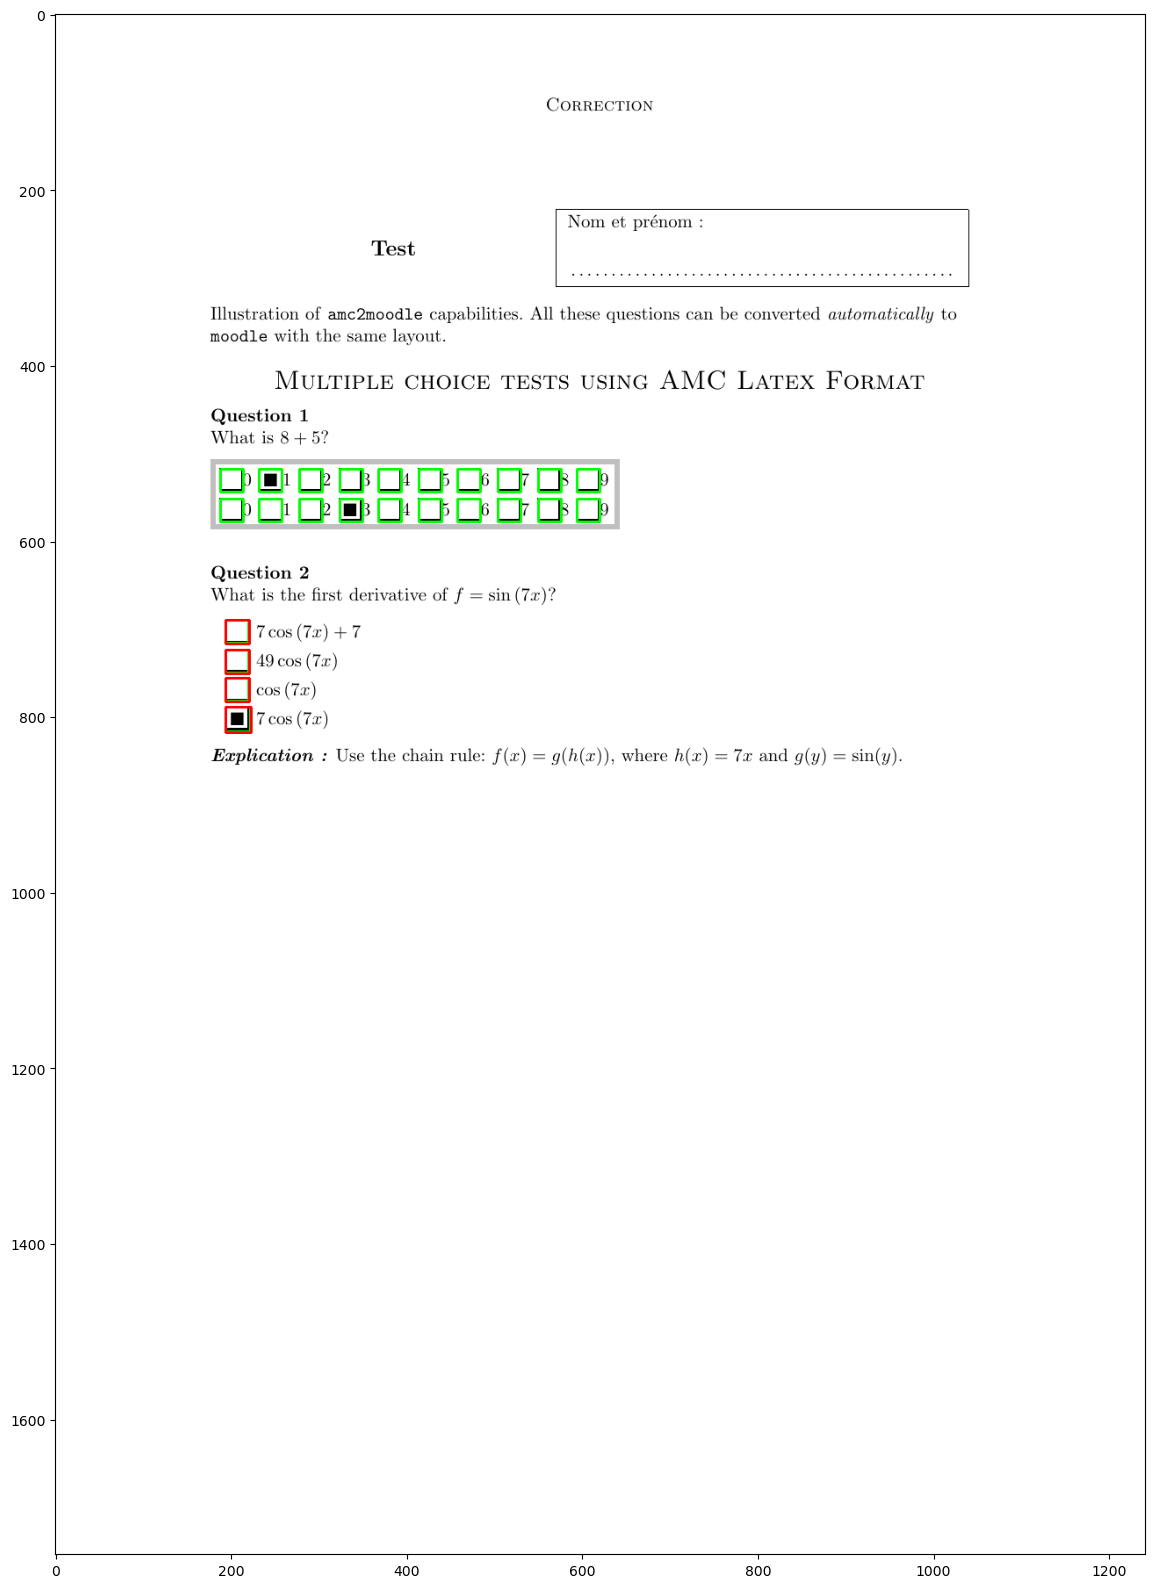

In [6]:
out_img = draw_rects(get_image(file_name), rects, thickness=3)

plt.figure(figsize=(20,20))
plt.imshow(output_image)
plt.show()

no reconoce las casillas del ejercicio 1 como casillas ya que estan demasiado cerca, cambiar la configuracion

In [7]:
#Esto sirve para identificar grupos de casillas, que no considera checkboxes si no character boxes
cfg.horizontal_max_distance = [10]

In [8]:
rects, grouping_rects, image, output_image = get_boxes(
    file_name, cfg=cfg, plot=False)

print(grouping_rects)

Processing file:  ../pyexams examples/en/png/sol_pdftoppm-1.png
[(188, 518, 27, 27), (232, 518, 27, 27), (278, 518, 27, 27), (324, 518, 27, 27), (368, 518, 27, 27), (414, 518, 27, 27), (458, 518, 27, 27), (504, 518, 27, 27), (550, 518, 27, 27), (594, 518, 27, 27), (188, 552, 27, 27), (232, 552, 27, 27), (278, 552, 27, 27), (324, 552, 27, 27), (368, 552, 27, 27), (414, 552, 27, 27), (458, 552, 27, 27), (504, 552, 27, 27), (550, 552, 27, 27), (594, 552, 27, 27), (194, 690, 27, 27), (194, 724, 27, 27), (194, 756, 27, 27), (194, 789, 29, 29)]


Processing file:  ../pyexams examples/en/png/sol_pdftoppm-1.png


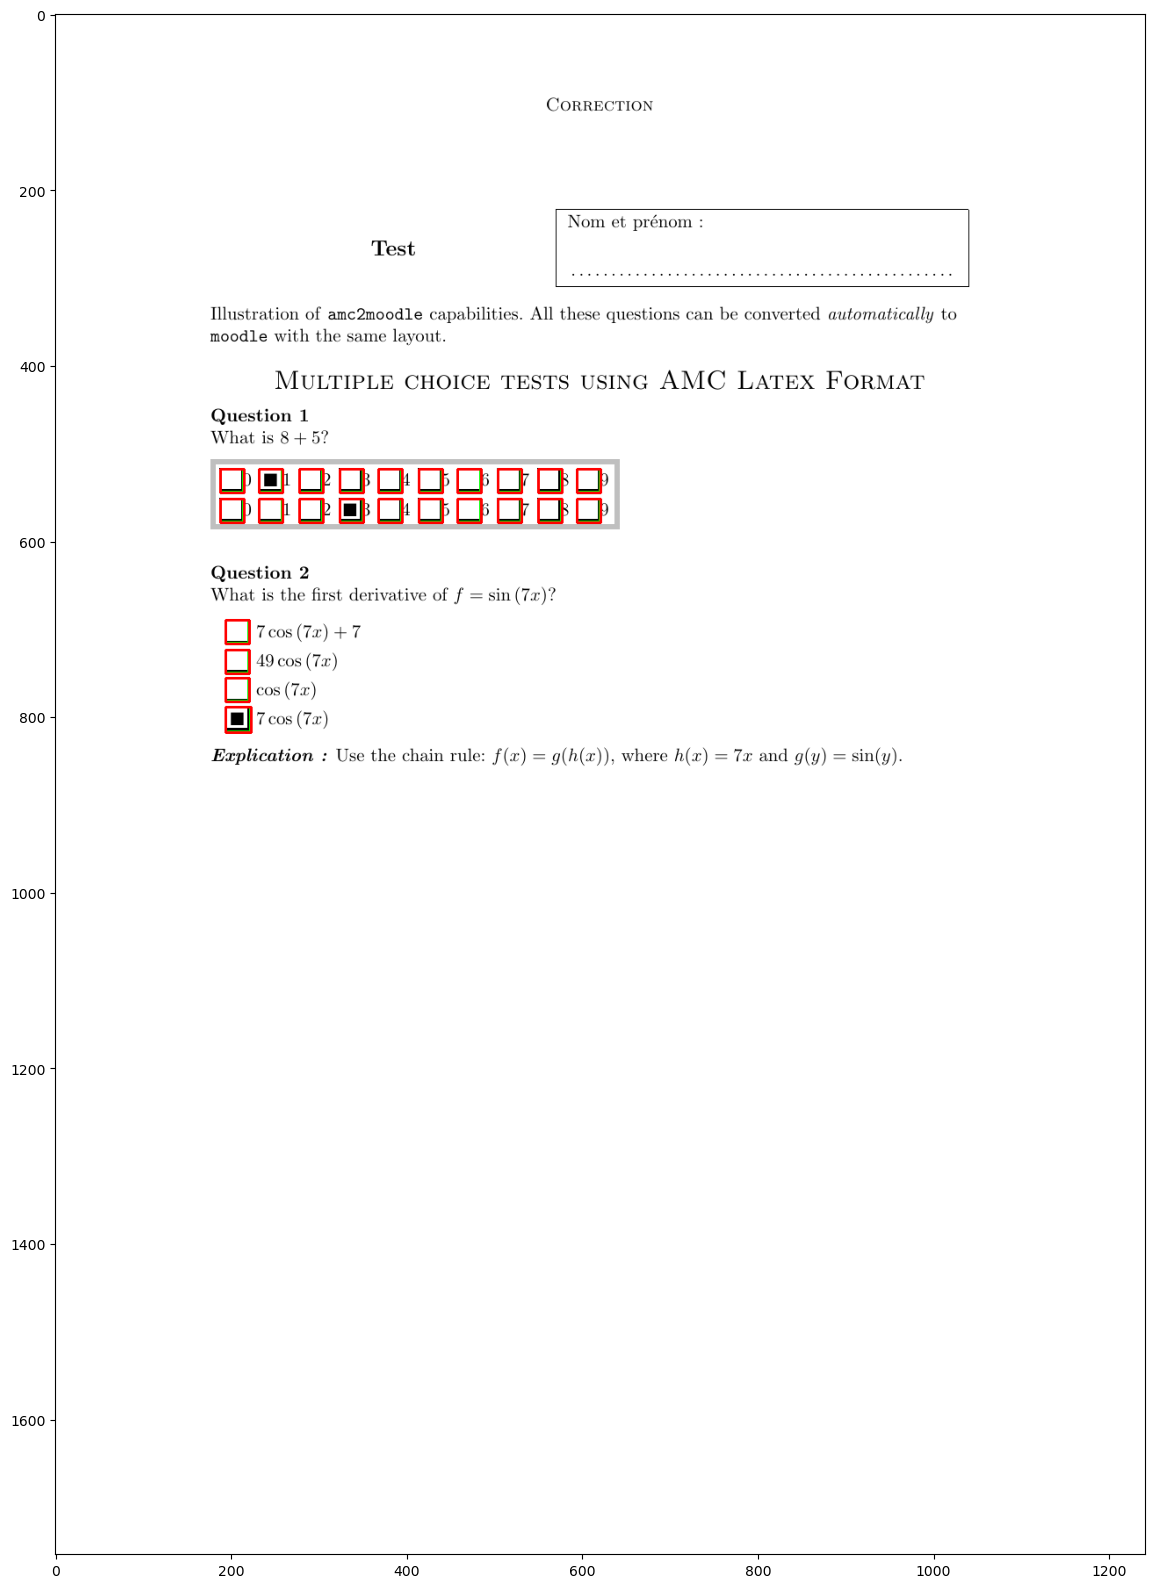

In [9]:
out_img = draw_rects(get_image(file_name), rects, thickness=3)

plt.figure(figsize=(20,20))
plt.imshow(output_image)
plt.show()

In [10]:
rects

array([[194, 789,  28,  28],
       [194, 756,  26,  26],
       [194, 724,  26,  26],
       [194, 690,  26,  26],
       [594, 552,  26,  26],
       [550, 552,  26,  26],
       [504, 552,  26,  26],
       [458, 552,  26,  26],
       [414, 552,  26,  26],
       [368, 552,  26,  26],
       [324, 552,  26,  26],
       [278, 552,  26,  26],
       [232, 552,  26,  26],
       [188, 552,  26,  26],
       [594, 518,  26,  26],
       [550, 518,  26,  26],
       [504, 518,  26,  26],
       [458, 518,  26,  26],
       [414, 518,  26,  26],
       [368, 518,  26,  26],
       [324, 518,  26,  26],
       [278, 518,  26,  26],
       [232, 518,  26,  26],
       [188, 518,  26,  26]])

In [11]:
grouping_rects

[(188, 518, 27, 27),
 (232, 518, 27, 27),
 (278, 518, 27, 27),
 (324, 518, 27, 27),
 (368, 518, 27, 27),
 (414, 518, 27, 27),
 (458, 518, 27, 27),
 (504, 518, 27, 27),
 (550, 518, 27, 27),
 (594, 518, 27, 27),
 (188, 552, 27, 27),
 (232, 552, 27, 27),
 (278, 552, 27, 27),
 (324, 552, 27, 27),
 (368, 552, 27, 27),
 (414, 552, 27, 27),
 (458, 552, 27, 27),
 (504, 552, 27, 27),
 (550, 552, 27, 27),
 (594, 552, 27, 27),
 (194, 690, 27, 27),
 (194, 724, 27, 27),
 (194, 756, 27, 27),
 (194, 789, 29, 29)]

In [12]:
from boxdetect.pipelines import get_checkboxes

In [13]:
checkboxes = get_checkboxes(
    file_name, cfg=cfg, px_threshold=0.1, plot=False, verbose=True)
checkboxes

Processing file:  ../pyexams examples/en/png/sol_pdftoppm-1.png
----------------------------------
nonzero_px_count:  0
all_px_count:  361
nonzero_px_count / all_px_count =  0.0
----------------------------------
----------------------------------
nonzero_px_count:  225
all_px_count:  361
nonzero_px_count / all_px_count =  0.6232686980609419
----------------------------------
----------------------------------
nonzero_px_count:  0
all_px_count:  361
nonzero_px_count / all_px_count =  0.0
----------------------------------
----------------------------------
nonzero_px_count:  0
all_px_count:  361
nonzero_px_count / all_px_count =  0.0
----------------------------------
----------------------------------
nonzero_px_count:  0
all_px_count:  361
nonzero_px_count / all_px_count =  0.0
----------------------------------
----------------------------------
nonzero_px_count:  0
all_px_count:  361
nonzero_px_count / all_px_count =  0.0
----------------------------------
-------------------------

array([[(188, 518, 27, 27), False,
        array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   

Output object type:  <class 'numpy.ndarray'>
Checkbox bounding rectangle (x,y,width,height):  (188, 518, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


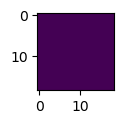

Checkbox bounding rectangle (x,y,width,height):  (232, 518, 27, 27)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


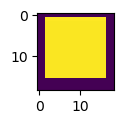

Checkbox bounding rectangle (x,y,width,height):  (278, 518, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


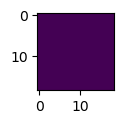

Checkbox bounding rectangle (x,y,width,height):  (324, 518, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


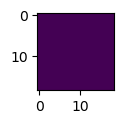

Checkbox bounding rectangle (x,y,width,height):  (368, 518, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


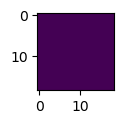

Checkbox bounding rectangle (x,y,width,height):  (414, 518, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


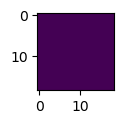

Checkbox bounding rectangle (x,y,width,height):  (458, 518, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


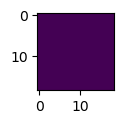

Checkbox bounding rectangle (x,y,width,height):  (504, 518, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


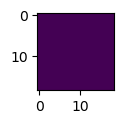

Checkbox bounding rectangle (x,y,width,height):  (550, 518, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


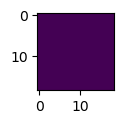

Checkbox bounding rectangle (x,y,width,height):  (594, 518, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


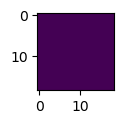

Checkbox bounding rectangle (x,y,width,height):  (188, 552, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


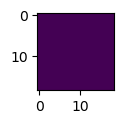

Checkbox bounding rectangle (x,y,width,height):  (232, 552, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


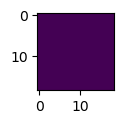

Checkbox bounding rectangle (x,y,width,height):  (278, 552, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


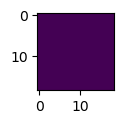

Checkbox bounding rectangle (x,y,width,height):  (324, 552, 27, 27)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


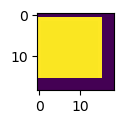

Checkbox bounding rectangle (x,y,width,height):  (368, 552, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


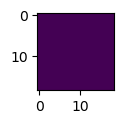

Checkbox bounding rectangle (x,y,width,height):  (414, 552, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


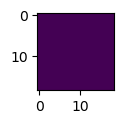

Checkbox bounding rectangle (x,y,width,height):  (458, 552, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


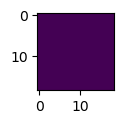

Checkbox bounding rectangle (x,y,width,height):  (504, 552, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


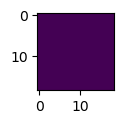

Checkbox bounding rectangle (x,y,width,height):  (550, 552, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


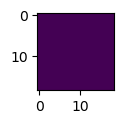

Checkbox bounding rectangle (x,y,width,height):  (594, 552, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


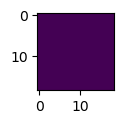

Checkbox bounding rectangle (x,y,width,height):  (194, 690, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


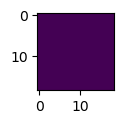

Checkbox bounding rectangle (x,y,width,height):  (194, 724, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


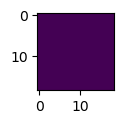

Checkbox bounding rectangle (x,y,width,height):  (194, 756, 27, 27)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


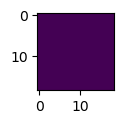

Checkbox bounding rectangle (x,y,width,height):  (194, 789, 29, 29)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


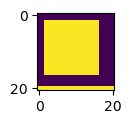

In [14]:
print("Output object type: ", type(checkboxes))
for checkbox in checkboxes:
    print("Checkbox bounding rectangle (x,y,width,height): ", checkbox[0])
    print("Result of `contains_pixels` for the checkbox: ", checkbox[1])
    print("Display the cropout of checkbox:")
    plt.figure(figsize=(1,1))
    plt.imshow(checkbox[2])
    plt.show()

In [22]:
boxes = []
for box in checkboxes.transpose()[0]:
    boxes.append(list(box))
boxes

[[188, 518, 27, 27],
 [232, 518, 27, 27],
 [278, 518, 27, 27],
 [324, 518, 27, 27],
 [368, 518, 27, 27],
 [414, 518, 27, 27],
 [458, 518, 27, 27],
 [504, 518, 27, 27],
 [550, 518, 27, 27],
 [594, 518, 27, 27],
 [188, 552, 27, 27],
 [232, 552, 27, 27],
 [278, 552, 27, 27],
 [324, 552, 27, 27],
 [368, 552, 27, 27],
 [414, 552, 27, 27],
 [458, 552, 27, 27],
 [504, 552, 27, 27],
 [550, 552, 27, 27],
 [594, 552, 27, 27],
 [194, 690, 27, 27],
 [194, 724, 27, 27],
 [194, 756, 27, 27],
 [194, 789, 29, 29]]

In [25]:
import json
with open('boxdetect_coords.json', 'w') as fp:
    json.dump(boxes, fp)